<a href="https://colab.research.google.com/github/victoriousvictor42/electic-car/blob/master/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **INTRODUCTION**



This is a hypothesis testing that is being conducted for Autolib electric car-sharing service company.
We are investigating a claim about blue cars from the Autolib dataset.


*   Null: (claim) is the number of blue cars taken in postal code 94700 different from 92170?

*   Alternative: the number of blue cars taken in postal code 94700 ia the same as 92170?

*   Significance level = 0.05


A documentation showing the step by step procedure is on the link provided, [click here](https://drive.google.com/open?id=1W3otjHsI0KM4ppfTDplxemefanlCOBdDbKPrDNN749M). 


In [0]:
# importing libraries that we will be working with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data we have

In [0]:
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
df2 = pd.read_excel('columns_explanation (1).xlsx')

Getting information about our dataset

In [3]:
df2

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
df.shape

(16085, 13)

In [8]:
# standardizing the columns names to
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

# Sampling the data set using simple random sampling


In [9]:
sample = df.sample(n=1500)
sample

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
6869,92260,1/9/2018,1439,1,weekday,22,22,2,2,0,1,0,0
6985,92260,5/8/2018,1425,1,weekday,23,23,0,0,1,2,0,0
11043,93260,1/20/2018,1439,5,weekend,70,69,0,0,1,1,14,14
1108,75008,1/17/2018,1440,2,weekday,458,460,18,18,30,29,130,134
11345,93310,1/11/2018,1440,3,weekday,15,13,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,75012,6/11/2018,1440,0,weekday,488,477,10,11,28,28,133,133
148,75001,6/12/2018,1439,1,weekday,126,126,4,4,21,22,16,16
12415,93500,3/17/2018,1440,5,weekend,48,47,6,6,9,10,0,0
368,75003,3/1/2018,1389,3,weekday,208,202,0,0,9,8,62,60


# ANOMALIES

In [10]:
# checking for missing values
sample.isnull().any().any()

False



> there are no existing missing values



In [11]:
# checking for duplicates
sample.duplicated().any()

False



> there ain't any duplicates in the dataset



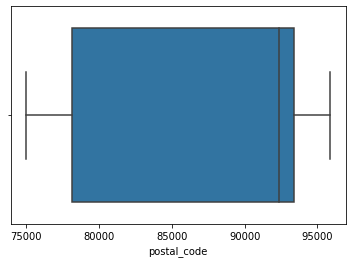

In [12]:
#checking for outliers
sns.boxplot(sample['postal_code'])
plt.show()

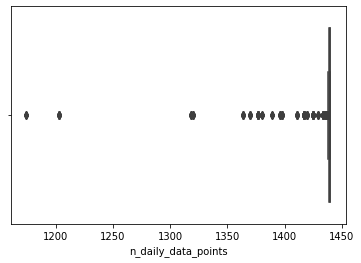

In [13]:
sns.boxplot(sample['n_daily_data_points'])
plt.show()

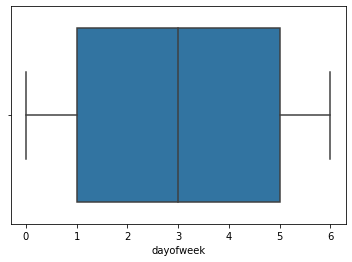

In [14]:
sns.boxplot(sample['dayofweek'])
plt.show()

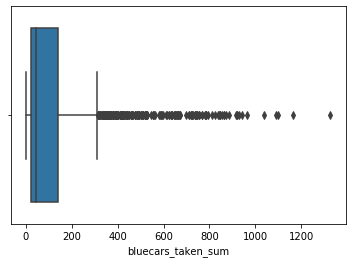

In [15]:
sns.boxplot(sample['bluecars_taken_sum'])
plt.show()

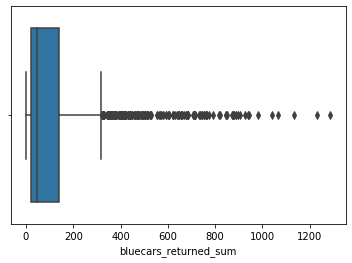

In [16]:
sns.boxplot(sample['bluecars_returned_sum'])
plt.show()

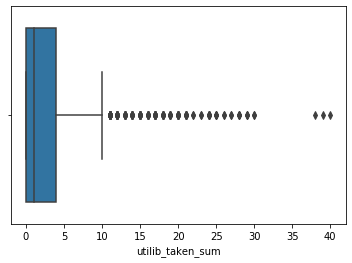

In [17]:
sns.boxplot(sample['utilib_taken_sum'])
plt.show()

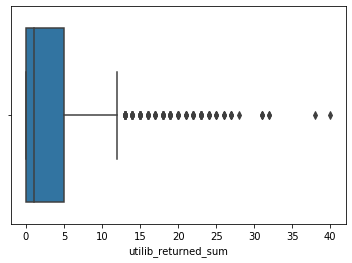

In [18]:
sns.boxplot(sample['utilib_returned_sum'])
plt.show()

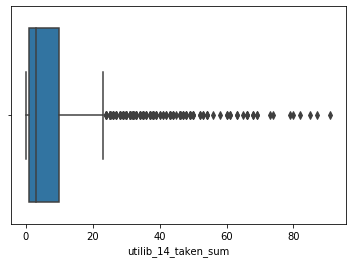

In [19]:
sns.boxplot(sample['utilib_14_taken_sum'])
plt.show()

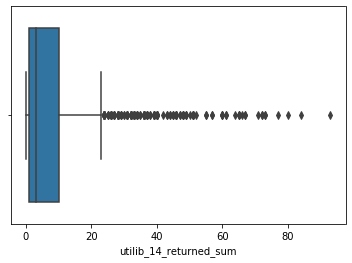

In [20]:
sns.boxplot(sample['utilib_14_returned_sum'])
plt.show()

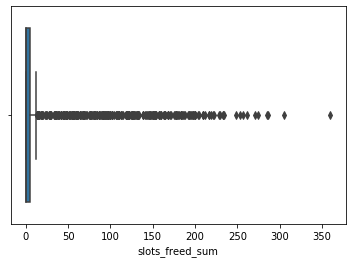

In [21]:
sns.boxplot(sample['slots_freed_sum'])
plt.show()

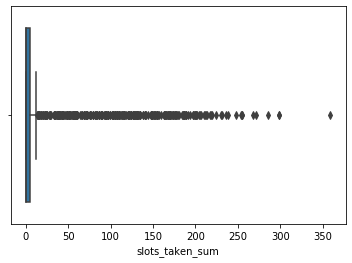

In [22]:
sns.boxplot(sample['slots_taken_sum'])
plt.show()

In [0]:
# labeling data on the categorical data so that we can check for outliers
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
sample['date'] = label.fit_transform(sample['date'])
sample['day_type'] = label.fit_transform(sample['day_type'])

In [24]:
# checking whether labelling has been applied to our dataset
print(df.date.unique())
print(df.day_type.unique())

['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2018' '2/1/2018' '2/2/2018' '2/3/2018' '2/4/2018' '2/5/2018'
 '2/6/2018' '2/7/2018' '2/8/2018' '2/9/2018' '2/10/2018' '2/11/2018'
 '2/12/2018' '2/13/2018' '2/14/2018' '2/15/2018' '2/16/2018' '2/17/2018'
 '2/18/2018' '2/19/2018' '2/20/2018' '2/21/2018' '2/22/2018' '2/23/2018'
 '2/24/2018' '2/28/2018' '3/1/2018' '3/2/2018' '3/3/2018' '3/4/2018'
 '3/5/2018' '3/6/2018' '3/7/2018' '3/8/2018' '3/9/2018' '3/10/2018'
 '3/11/2018' '3/12/2018' '3/13/2018' '3/14/2018' '3/15/2018' '3/16/2018'
 '3/17/2018' '3/18/2018' '3/19/2018' '3/20/2018' '3/21/2018' '3/22/2018'
 '3/23/2018' '3/24/2018' '3/25/2018' '3/26/2018' '3/27/2018' '3/28/2018'
 '3/2

In [25]:
sample.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

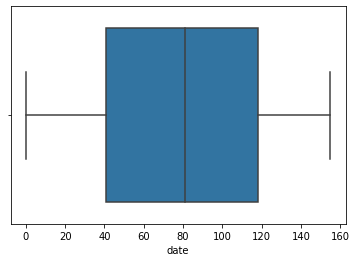

In [26]:
sns.boxplot(sample['date'])
plt.show()

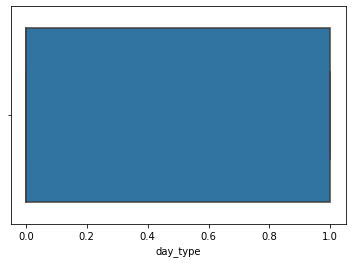

In [27]:
sns.boxplot(sample['day_type'])
plt.show()



> we confrim that there are outliers in the following columns

*   postal code
*   number of daily data points
*   bluecars taken sum
*   bluecars returned sum
*   utilib taken sum
*   utilib returned sum
*   utilib 14 taken sum
*   utilib 14 returned sum
*   slots freed sum
*   slots taken item














**Dealing with anomalies**



> removing the outliers in the dataset using z-score



In [28]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(sample))
print(z)

[[0.47791388 1.09186436 0.22304868 ... 0.59079547 0.44336683 0.44379298]
 [0.47791388 1.24667886 0.24917859 ... 0.51418155 0.44336683 0.44379298]
 [0.60595292 1.48897548 0.22304868 ... 0.59079547 0.18132232 0.18070432]
 ...
 [0.63668228 0.34176559 0.2567792  ... 0.0987298  0.44336683 0.44379298]
 [1.7316557  0.51825942 1.46347728 ... 0.05449803 0.717116   0.68372984]
 [0.61875682 1.20255541 0.22304868 ... 0.36095371 0.44336683 0.44379298]]


In [29]:
threshold = 3
print(np.where(z > 3))

(array([  27,   48,   48,   48,   48,   68,   83,   83,   83,   83,   83,
         97,  130,  143,  143,  147,  148,  163,  176,  182,  182,  182,
        182,  182,  187,  187,  198,  198,  198,  198,  208,  208,  208,
        208,  208,  208,  220,  220,  232,  253,  253,  253,  269,  275,
        293,  294,  294,  294,  294,  320,  320,  320,  320,  320,  320,
        337,  339,  339,  339,  339,  339,  339,  339,  339,  351,  351,
        351,  351,  351,  351,  351,  351,  387,  387,  387,  387,  387,
        387,  387,  387,  409,  409,  409,  409,  409,  419,  419,  442,
        442,  442,  442,  442,  442,  472,  472,  492,  492,  492,  492,
        492,  492,  501,  518,  528,  528,  537,  544,  544,  544,  544,
        548,  548,  548,  548,  548,  560,  560,  560,  656,  656,  656,
        656,  656,  656,  656,  656,  664,  664,  664,  664,  664,  664,
        694,  694,  694,  694,  707,  707,  707,  707,  724,  724,  724,
        724,  724,  724,  740,  740,  740,  740,  

In [30]:
sample1 = sample[(z < 3).all(axis=1)]
print(sample.shape)
print(sample1.shape)

(1500, 13)
(1393, 13)




> As you can see, the outliers have been removed. The rows have been reduced from 1500 to 1395.



# **Explanatory Data Analysis**

we are conducting an EDA on the dataset so as to get intresting facts about it.

**Univariate Data Analysis**



> we are going to start with the blue car variables since thats where the claim is based on. 



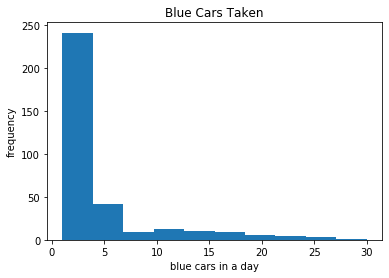

In [31]:
sample1['bluecars_taken_sum'].value_counts().plot.hist()
plt.ylabel('frequency')
plt.xlabel('blue cars in a day')
plt.title('Blue Cars Taken')
plt.show()



> The distribution shows that a lot of blue cars are taken are from the range of one to four in a day



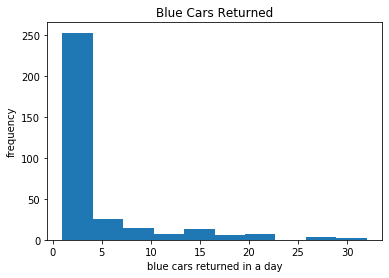

In [32]:
sample1['bluecars_returned_sum'].value_counts().plot.hist()
plt.ylabel('frequency')
plt.xlabel('blue cars returned in a day')
plt.title('Blue Cars Returned')
plt.show()



> The distribution shows that a lot of blue cars are returned are from the range of one to four in a day





We are going next for the postal codes since they rise some interest in our hypothesis



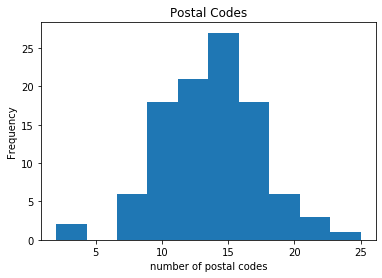

In [33]:
sample1.postal_code.value_counts().plot.hist()
plt.xlabel('number of postal codes')
plt.ylabel('Frequency')
plt.title('Postal Codes')
plt.show()



> the distribution shows that there are very many postal codes between 9 and 19



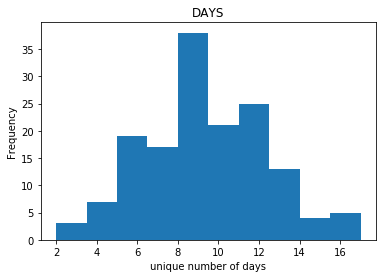

In [34]:
sample1.date.value_counts().plot.hist()
plt.ylabel('Frequency')
plt.xlabel('unique number of days')
plt.title('DAYS')
plt.show()



> there are mostly 7 to 13 days that vehicles are normally taken or returned, according to the distribution



Daily points given in a day can also show give a good insight about the data

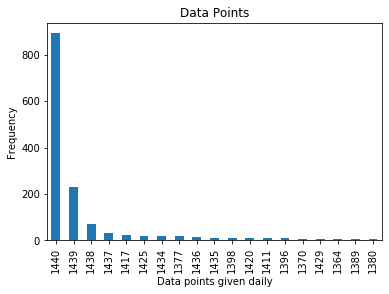

In [35]:
sample1.n_daily_data_points.value_counts().plot.bar()
plt.xlabel("Data points given daily")
plt.ylabel("Frequency")
plt.title('Data Points')
plt.show()



> 1440 is the most given data point on a daily basis



utilib taken also rises some interest

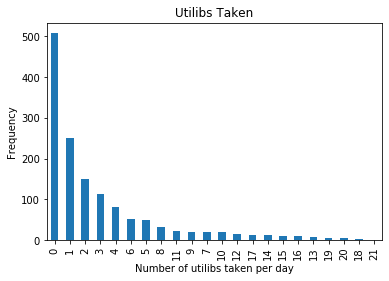

In [36]:
sample1.utilib_taken_sum.value_counts().plot.bar()
plt.xlabel('Number of utilibs taken per day')
plt.ylabel('Frequency')
plt.title('Utilibs Taken')
plt.show()



> utilibs are not taken in most cases



utilibs that are returned

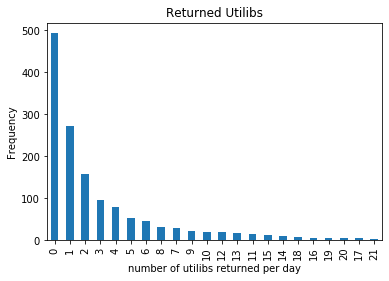

In [37]:
sample1.utilib_returned_sum.value_counts().plot.bar()
plt.xlabel('number of utilibs returned per day')
plt.ylabel('Frequency')
plt.title('Returned Utilibs')
plt.show()



> in most cases the utilibs are not returned



utilib 14 strikes another level of interest

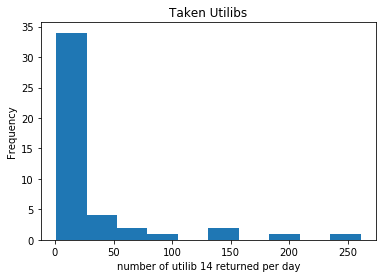

In [38]:
sample1.utilib_14_taken_sum.value_counts().plot.hist()
plt.xlabel('number of utilib 14 returned per day')
plt.ylabel('Frequency')
plt.title('Taken Utilibs')
plt.show()

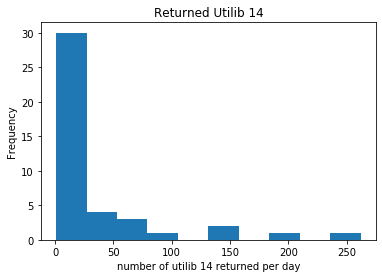

In [39]:
sample1.utilib_14_returned_sum.value_counts().plot.hist()
plt.xlabel('number of utilib 14 returned per day')
plt.ylabel('Frequency')
plt.title('Returned Utilib 14')
plt.show()



> According to the distribution, most of utilib 14 that are either taken or returned ranges from 1 to 25.



finally, slots raise some of interest

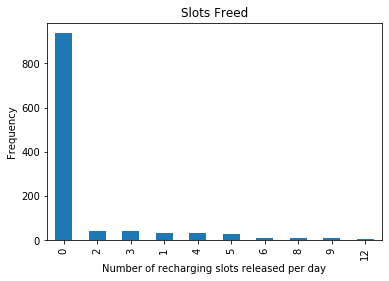

In [40]:
sample1.slots_freed_sum.value_counts().head(10).plot.bar()
plt.xlabel('Number of recharging slots released per day')
plt.ylabel('Frequency')
plt.title('Slots Freed')
plt.show()

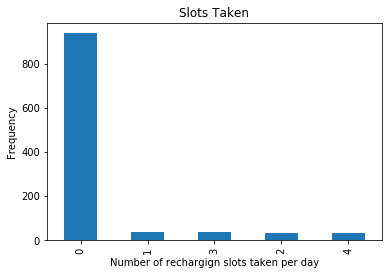

In [41]:
sample1.slots_taken_sum.value_counts().head().plot.bar()
plt.xlabel('Number of rechargign slots taken per day')
plt.ylabel('Frequency')
plt.title('Slots Taken')
plt.show()



> In most cases the are no of slots that are either taken or freed



checking the days of the week that cars were either taken or returned

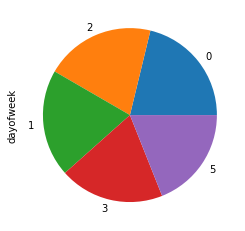

In [42]:
sample1.dayofweek.value_counts().head().plot.pie()

plt.show()



> there is a fair share of the days that the electric cars are either taken or returned but only on thursday and saturday, there are no activities.



checking whether most electric cars were either taken or retruned in a weekday or weekend

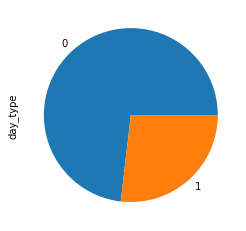

In [43]:
sample1.day_type.value_counts().head().plot.pie()

plt.show()



> weekdays is the most prominent days went taking and returning activities are most common



**Bivariate Data Analysis**

*correlation*

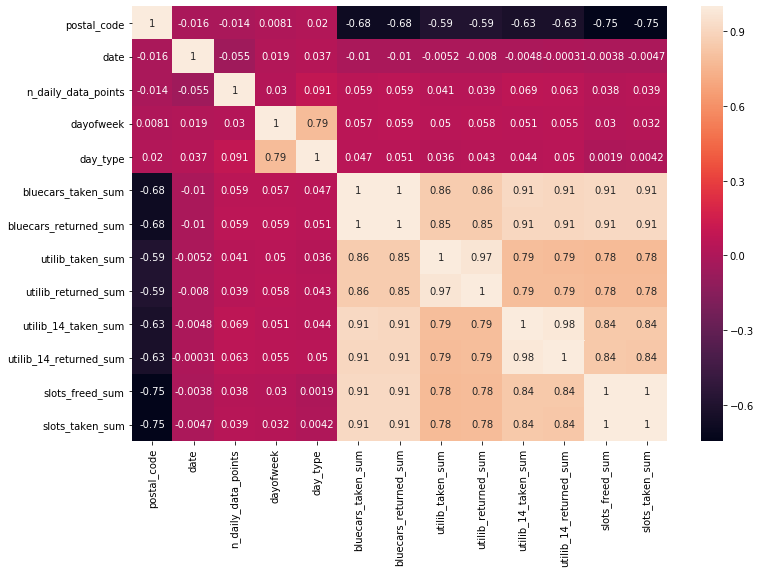

In [44]:
plt.figure(figsize=(12, 8))

vg_corr = sample1.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);



> 

*   values almost to 1 show a positive correlation between the variables
*   values almost to -1 show a negative correlation between the variables





*cross plot*

<Figure size 1008x1008 with 0 Axes>

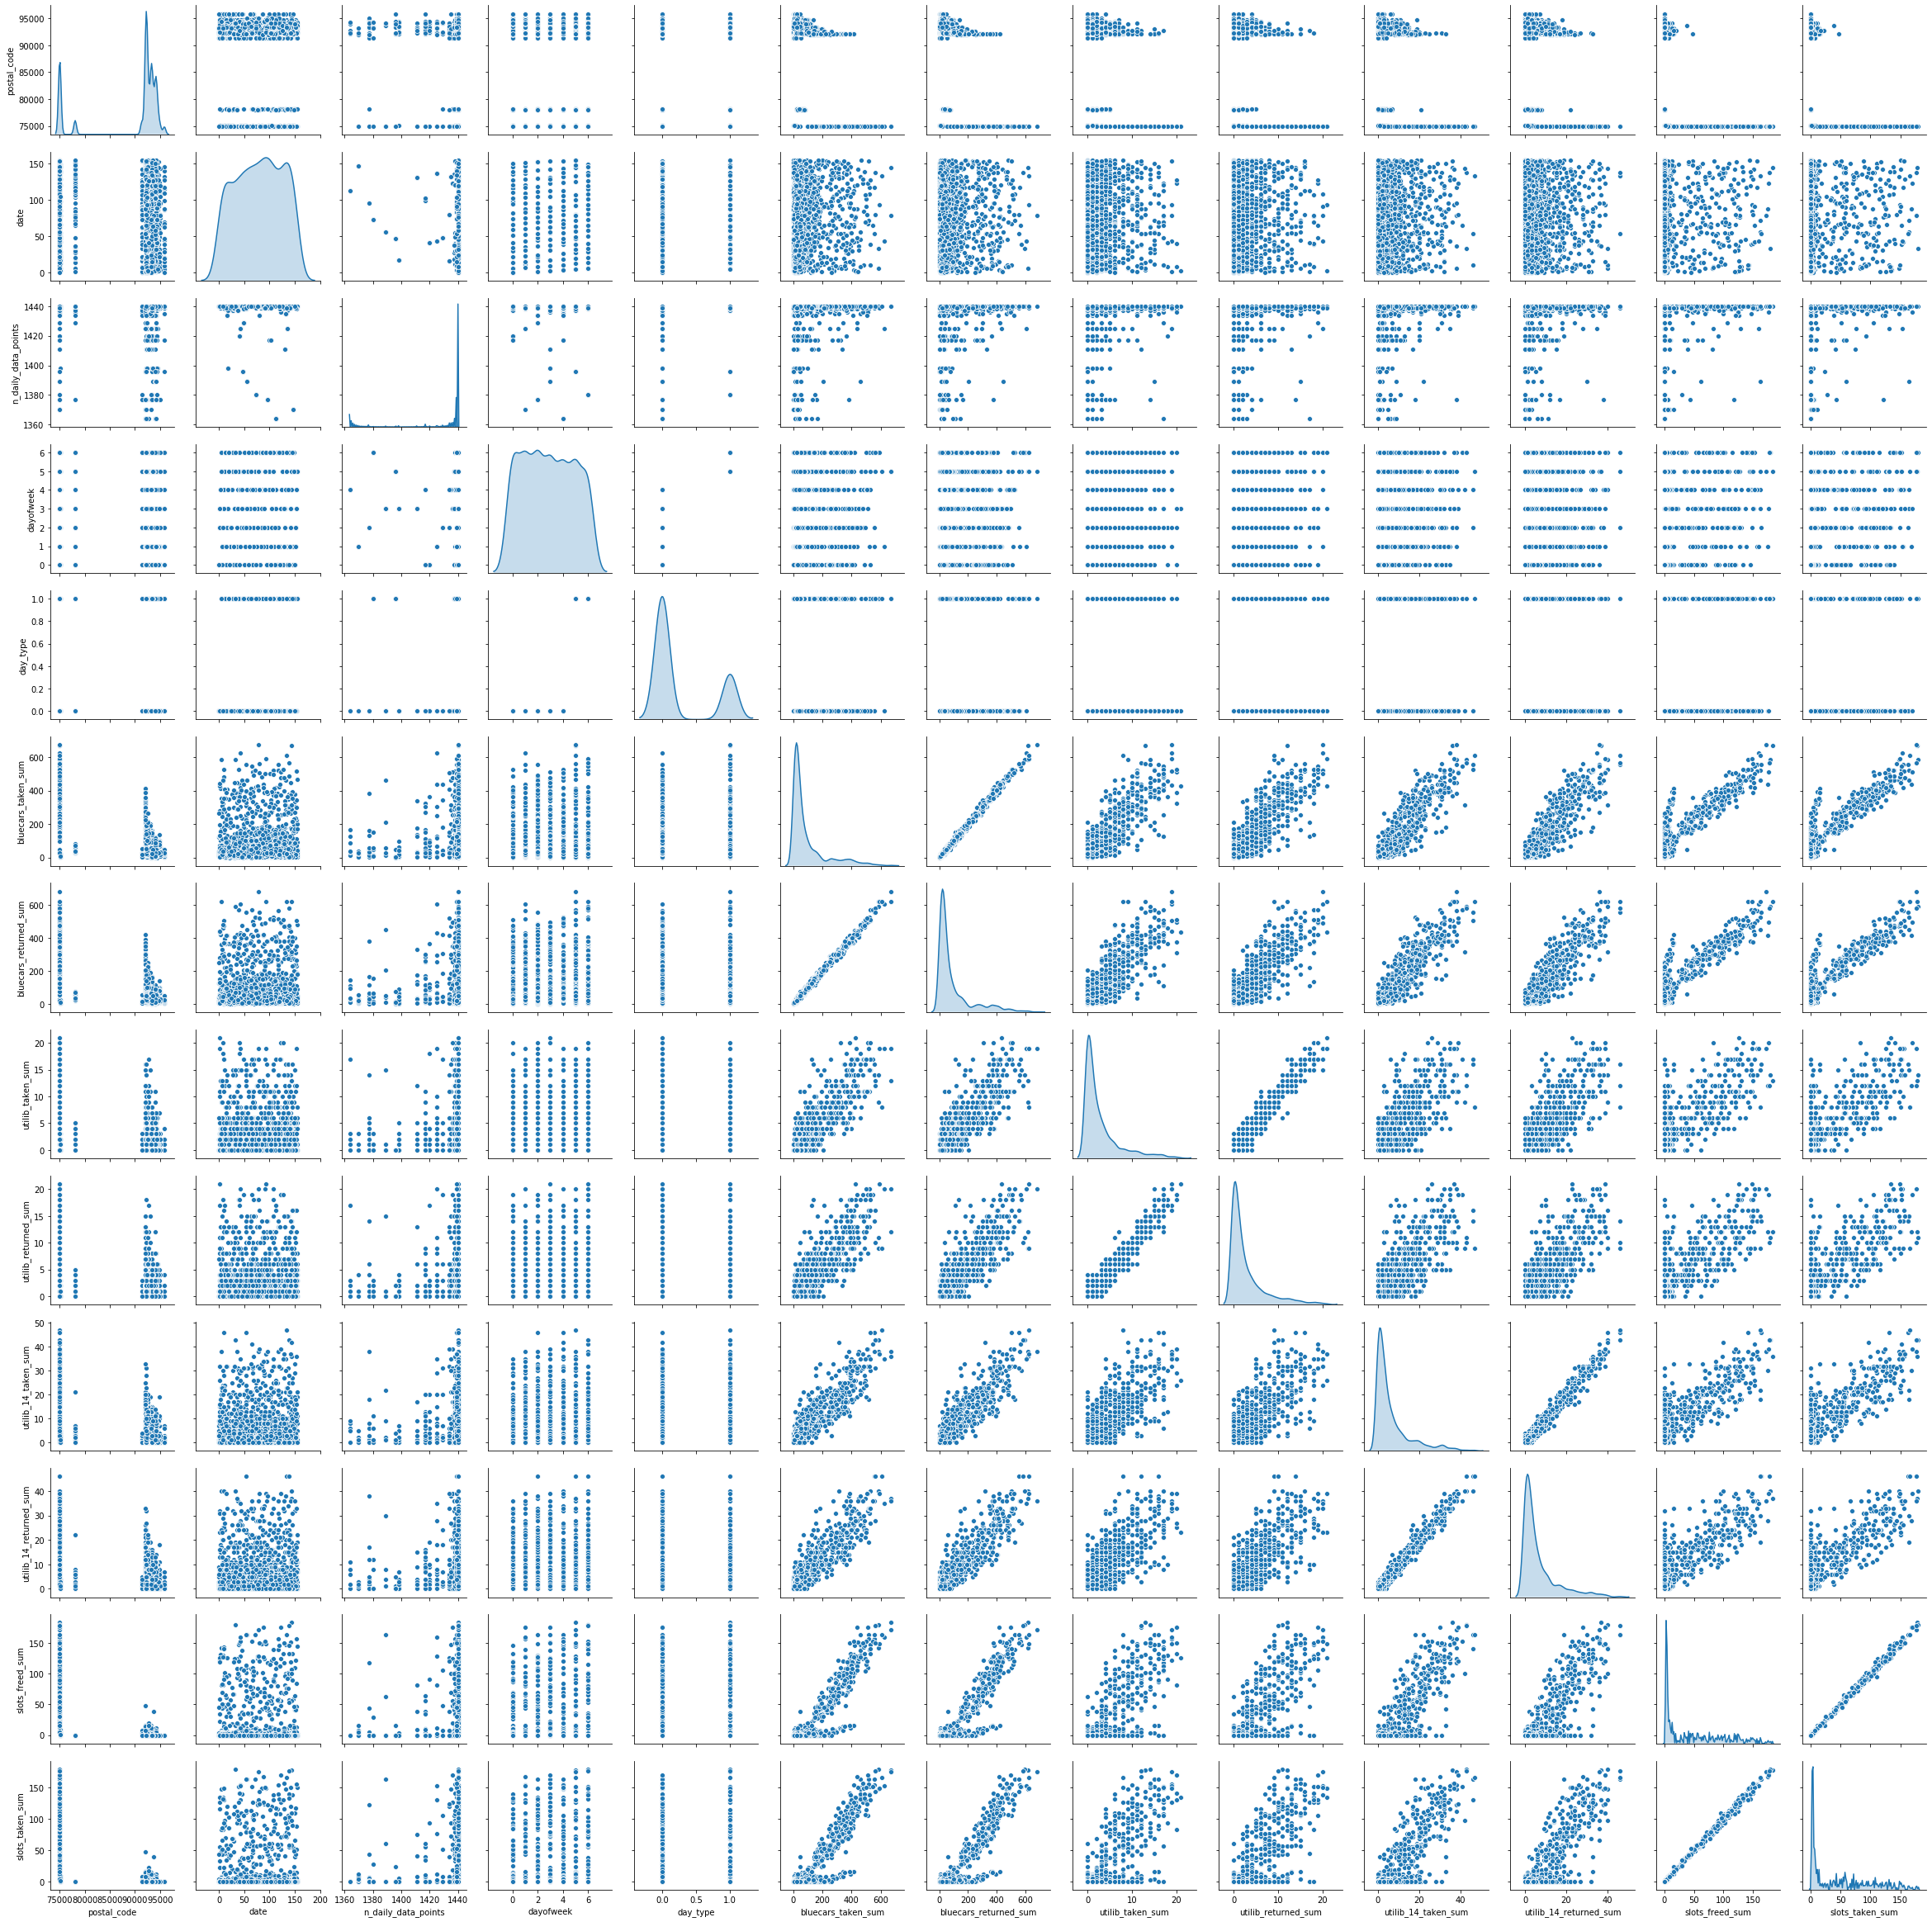

In [45]:
plt.figure(figsize=(14, 14))

sns.pairplot(sample1, diag_kind='kde')

**Evolution of Blue Cars Over Time**


blue cars taken vs postal code

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


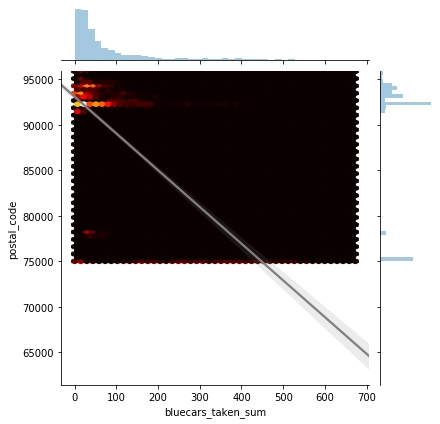

In [123]:
g = sns.jointplot(x = 'bluecars_taken_sum', 
              y = 'postal_code',
              data = sample1, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)
sns.regplot(sample1.bluecars_taken_sum, sample1.postal_code, ax=g.ax_joint, scatter=False, color='grey');

# Test Analysis: Testing Our Hypothesis

First we have to determine the claims about the blue cars from the provided autolib dataset.

In [121]:
# selecting data from the dataset. 

sample = sample1[(sample1.bluecars_taken_sum) & (sample1.day_type==0) & (sample1.postal_code==94700)]
print(sampledata.bluecars_taken_sum.mean())
print(sampledata.shape[0])
sampledata.bluecars_taken_sum.std()

28.8
10


8.612652191849952

In [120]:
sampledata1 = sample1[(sample1.bluecars_taken_sum) & (sample1.day_type==0) & (sample1.postal_code==92170)]
print(sampledata1.bluecars_taken_sum.mean())
print(sampledata1.shape[0])
sampledata1.bluecars_taken_sum.std()

48.5
4


5.972157622389639

# Testing our hypothesis

In [78]:
# Getting the mean of the two populations
mean1 = sampledata.bluecars_taken_sum.mean()
print(mean1)
mean2 = sampledata1.bluecars_taken_sum.mean()
mean2


28.8


48.5

In [80]:
# Getting the standard deviation of the two populations
sd1 = sampledata.bluecars_taken_sum.std()
print(sd1)
sd2 = sampledata1.bluecars_taken_sum.std()
sd2

8.612652191849952


5.972157622389639

In [81]:
n1 = len(sampledata.bluecars_taken_sum)
print(n1)
n2 = len(sampledata1.bluecars_taken_sum) 
n2

10


4

In [87]:
# caculating the satndard errors
se1 = sd1/np.sqrt(n1)
print(se1)
se2 = sd2/np.sqrt(n2)
se2

2.723559762108733


2.9860788111948193

In [89]:
# standard error on the difference between the samples
sed = np.sqrt(se1 ** 2.0 + se2 ** 2.0)
sed

4.041589346339438

In [94]:
# calculate the t statistic
t_stat = (mean1-mean2) / sed
t_stat

-4.874320053778534

In [93]:
# degrees of freedom
d = n1 + n2 -2
d

12

In [101]:
# calculate the critical value
# but, first import scipy library
from scipy.stats import norm


alpha = 0.05
cv = norm.ppf(1.0 - alpha,d)
cv

13.644853626951472

In [104]:
# calculate the p-value
p = (1-norm.cdf(abs(t_stat), d)) * 2
p

1.9999999999989644



> The p-value is greater than our significant level. we reject the null hypothesis in favour of the alternative hypothesis

---



